### Importing Modules 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,RocCurveDisplay,auc,roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['font.size'] = 14

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Loading The Dataset and Extract Information 

In [2]:
df = pd.read_csv('data_clean.csv')
df.head()

,Unnamed: 0,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
0,1,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0
3,7,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13137 entries, 0 to 13136
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      13137 non-null  int64  
 1   SEQN                            13137 non-null  int64  
 2   Gender                          13137 non-null  int64  
 3   Age                             13137 non-null  int64  
 4   Race                            13137 non-null  int64  
 5   CountryofBirth                  13137 non-null  int64  
 6   Education                       8381 non-null   float64
 7   FamIncomeRatio                  11443 non-null  float64
 8   Weight                          13137 non-null  float64
 9   Height                          13137 non-null  float64
 10  BMI                             13137 non-null  float64
 11  Diabetes                        13137 non-null  int64  
 12  ModerateWorkActivity            

In [4]:
df.isna().sum()

Unnamed: 0                           0
SEQN                                 0
Gender                               0
Age                                  0
Race                                 0
CountryofBirth                       0
Education                         4756
FamIncomeRatio                    1694
Weight                               0
Height                               0
BMI                                  0
Diabetes                             0
ModerateWorkActivity              4347
ModerateRecreationalActivities    4347
Depressed                         4934
PoorAppetiteOvereating            4935
Smoking                           9616
SleepHoursWeekdays                3949
SleepHoursWeekend                 3954
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df = df.drop(['SEQN', 'Unnamed: 0'], axis=1)

In [7]:
df.head()

,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
5,1,36,3,1,4.0,0.83,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0
12,1,76,3,1,5.0,3.61,83.3,177.1,26.6,2,2.0,2.0,1.000000e+00,5.397605e-79,3.0,7.0,8.0
33,1,47,6,2,1.0,1.38,67.9,166.2,24.6,2,2.0,2.0,5.397605e-79,5.397605e-79,3.0,7.5,11.0
51,1,76,6,2,4.0,2.37,61.5,162.5,23.3,2,2.0,1.0,5.397605e-79,5.397605e-79,3.0,8.0,8.0
54,2,54,3,1,2.0,1.00,59.8,156.1,24.5,2,2.0,2.0,5.397605e-79,5.397605e-79,1.0,7.0,5.0


In [8]:
df = df.reset_index(drop=True)
df.head()

,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
0,1,36,3,1,4.0,0.83,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0
1,1,76,3,1,5.0,3.61,83.3,177.1,26.6,2,2.0,2.0,1.000000e+00,5.397605e-79,3.0,7.0,8.0
2,1,47,6,2,1.0,1.38,67.9,166.2,24.6,2,2.0,2.0,5.397605e-79,5.397605e-79,3.0,7.5,11.0
3,1,76,6,2,4.0,2.37,61.5,162.5,23.3,2,2.0,1.0,5.397605e-79,5.397605e-79,3.0,8.0,8.0
4,2,54,3,1,2.0,1.00,59.8,156.1,24.5,2,2.0,2.0,5.397605e-79,5.397605e-79,1.0,7.0,5.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2865 non-null   int64  
 1   Age                             2865 non-null   int64  
 2   Race                            2865 non-null   int64  
 3   CountryofBirth                  2865 non-null   int64  
 4   Education                       2865 non-null   float64
 5   FamIncomeRatio                  2865 non-null   float64
 6   Weight                          2865 non-null   float64
 7   Height                          2865 non-null   float64
 8   BMI                             2865 non-null   float64
 9   Diabetes                        2865 non-null   int64  
 10  ModerateWorkActivity            2865 non-null   float64
 11  ModerateRecreationalActivities  2865 non-null   float64
 12  Depressed                       28

### EDA - Using Padas Profiling

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("your_report_project.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Extract BMI 

In [11]:
obese_condition = [(df['BMI'] < 18.5),
                   (df['BMI'] >= 18.5) & (df['BMI'] < 25.0),
                   (df['BMI'] >= 25.0) & (df['BMI'] < 30.0),
                   (df['BMI'] > 30.0)]

# 1 - Under Weight
# 2 - Healthy
# 3 - Overweight
# 4 - Obese
obese_value = [1, 2, 3, 4]

df['obesity'] = np.select(obese_condition, obese_value, default = 1)

In [12]:
df.head()

,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity
0,1,36,3,1,4.0,0.83,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0,2
1,1,76,3,1,5.0,3.61,83.3,177.1,26.6,2,2.0,2.0,1.000000e+00,5.397605e-79,3.0,7.0,8.0,3
2,1,47,6,2,1.0,1.38,67.9,166.2,24.6,2,2.0,2.0,5.397605e-79,5.397605e-79,3.0,7.5,11.0,2
3,1,76,6,2,4.0,2.37,61.5,162.5,23.3,2,2.0,1.0,5.397605e-79,5.397605e-79,3.0,8.0,8.0,2
4,2,54,3,1,2.0,1.00,59.8,156.1,24.5,2,2.0,2.0,5.397605e-79,5.397605e-79,1.0,7.0,5.0,2


In [13]:
df['obesity'].value_counts()

4    1259
3     886
2     655
1      65
Name: obesity, dtype: int64

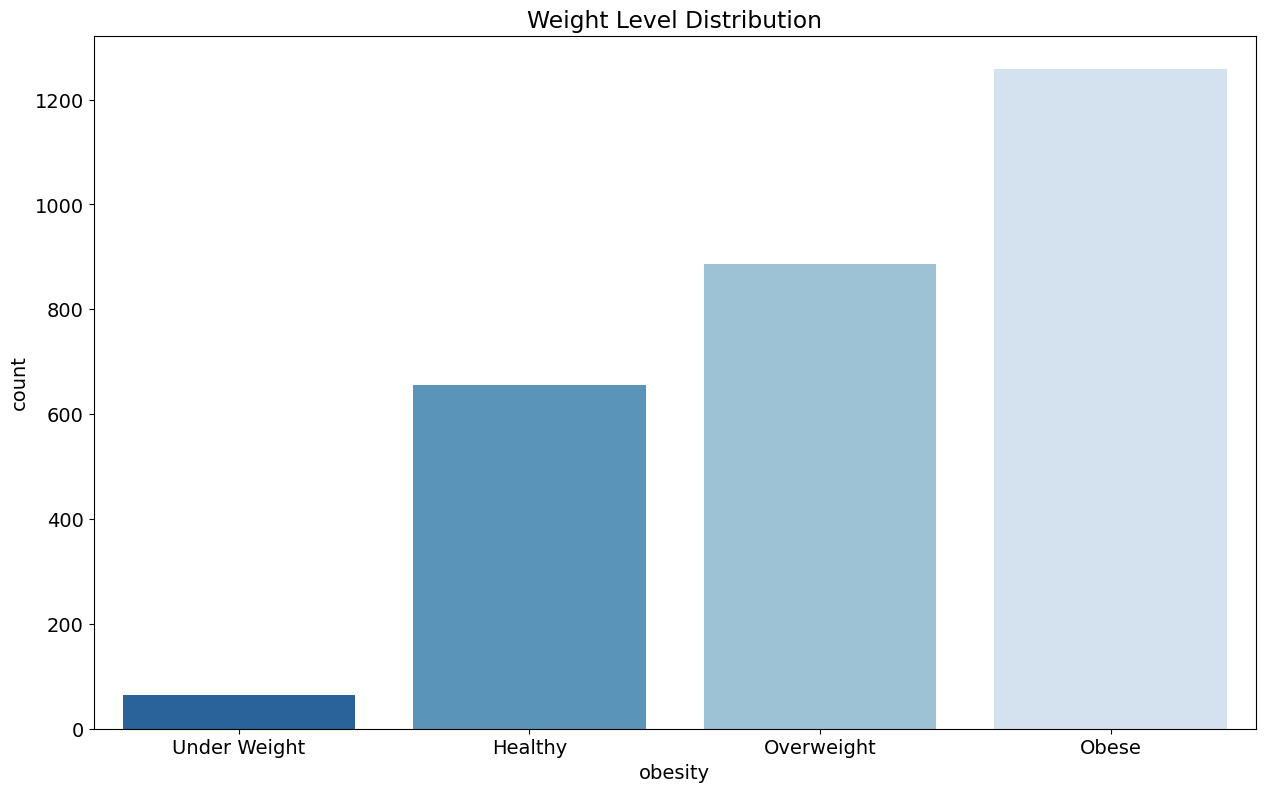

In [14]:
# Obesity distribution plot
sns.countplot(x='obesity', data=df,palette="Blues_r")
plt.title('Weight Level Distribution')
positions=(0, 1, 2, 3)
labels=("Under Weight", "Healthy", "Overweight", "Obese")
plt.xticks(positions, labels)
plt.show();

In [15]:
obese_condition_2 = [(df['BMI'] < 30.0),
                   (df['BMI'] > 30.0)]

# 1 - Not Obese
# 2 - Obese
obese_value_2 = [1, 2]

df['obesity2'] = np.select(obese_condition_2, obese_value_2, default = 1)

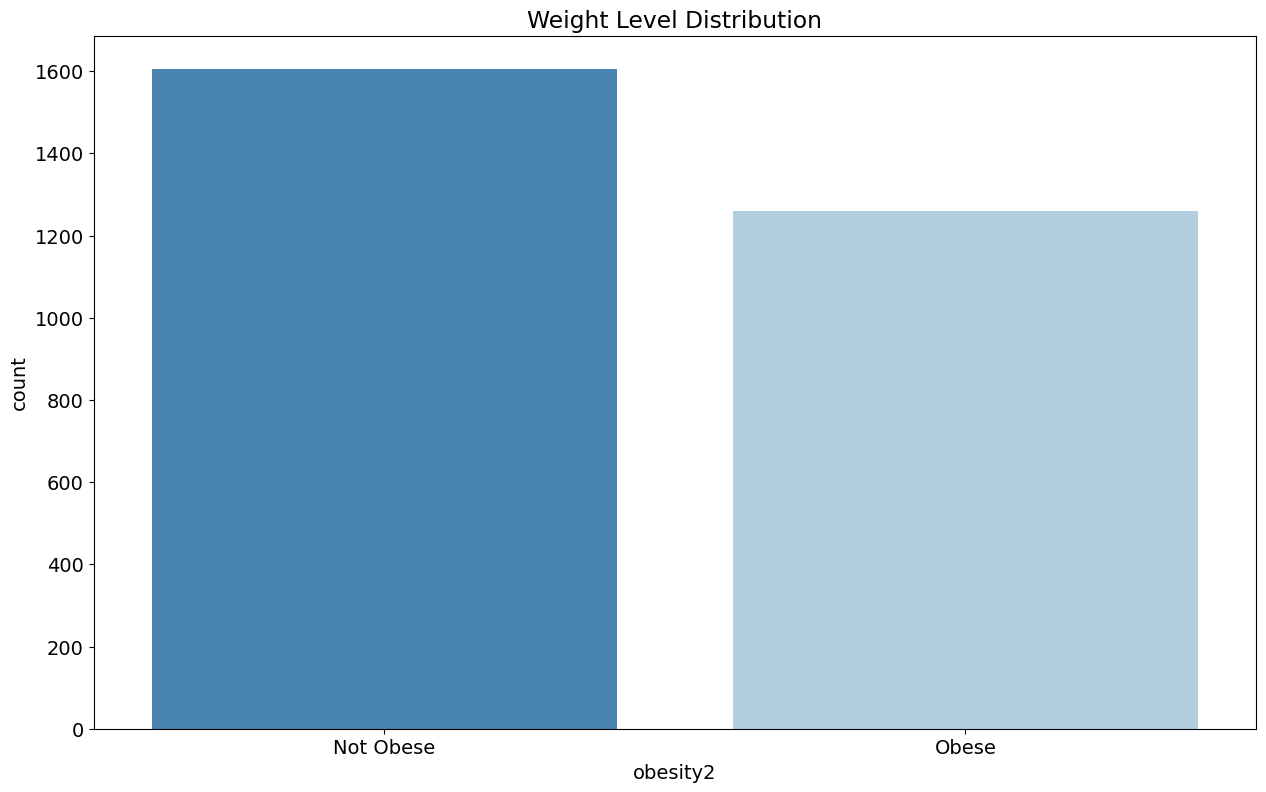

In [16]:
# Obesity distribution plot
sns.countplot(x='obesity2', data=df,palette="Blues_r")
plt.title('Weight Level Distribution')
positions=(0, 1)
labels=("Not Obese", "Obese")
plt.xticks(positions, labels)
plt.show();

In [17]:
df.corr()

,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity,obesity2
Gender,1.000000,-0.070136,-0.013243,-0.112196,0.060514,-0.064469,-0.125298,-0.645780,0.155914,0.052192,0.077536,0.018039,0.110718,0.135008,-0.019391,0.067259,0.074177,0.083089,0.121545
Age,-0.070136,1.000000,-0.001073,-0.022205,-0.024755,0.110054,-0.076594,-0.114848,-0.032896,-0.210279,0.169778,0.082779,-0.070549,-0.079581,0.293587,0.084498,-0.073875,0.024408,-0.032665
Race,-0.013243,-0.001073,1.000000,-0.119232,0.179567,0.009487,-0.010840,0.086694,-0.050261,-0.012827,0.048551,-0.027137,-0.003348,0.006831,-0.077019,-0.050359,-0.071720,-0.063744,-0.048325
CountryofBirth,-0.112196,-0.022205,-0.119232,1.000000,-0.100972,-0.018826,-0.115157,-0.121531,-0.071785,-0.008961,0.060086,-0.017824,-0.028894,-0.064907,0.103431,-0.013796,0.048608,-0.033640,-0.080306
Education,0.060514,-0.024755,0.179567,-0.100972,1.000000,0.393829,0.056238,0.094086,0.012926,0.072468,-0.006417,-0.189824,-0.065088,-0.075384,0.121068,-0.018877,-0.037132,0.025920,0.003256
FamIncomeRatio,-0.064469,0.110054,0.009487,-0.018826,0.393829,1.000000,0.025817,0.099932,-0.024577,0.035298,-0.005355,-0.174946,-0.151183,-0.121786,0.276127,-0.039865,0.014021,0.017512,-0.028562
Weight,-0.125298,-0.076594,-0.010840,-0.115157,0.056238,0.025817,1.000000,0.362195,0.902796,-0.134359,-0.058469,0.017967,0.012589,0.088201,0.120498,-0.074799,-0.052520,0.728043,0.703857
Height,-0.645780,-0.114848,0.086694,-0.121531,0.094086,0.099932,0.362195,1.000000,-0.060507,0.000807,-0.109608,-0.064672,-0.073023,-0.085206,-0.050018,-0.093321,-0.087518,-0.030439,-0.037447
BMI,0.155914,-0.032896,-0.050261,-0.071785,0.012926,-0.024577,0.902796,-0.060507,1.000000,-0.141583,-0.015783,0.049064,0.046394,0.136689,0.147836,-0.041095,-0.016060,0.790721,0.768982
Diabetes,0.052192,-0.210279,-0.012827,-0.008961,0.072468,0.035298,-0.134359,0.000807,-0.141583,1.000000,-0.055021,-0.067720,-0.062595,-0.028119,-0.067290,0.010718,0.017704,-0.145689,-0.139958


In [18]:
def matrix_plot(df,title):

    sns.set(style="ticks")

    corr = df.corr()
    corr = np.round(corr, decimals=2)


    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(20, 20))
    #cmap = sns.diverging_palette(580, 10, as_cmap=True)
    cmap = sns.diverging_palette(180, 90, as_cmap=True) #Inna paleta barw

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0.03,annot=True,
                square=True, linewidths=.9, cbar_kws={"shrink": 0.8})
    plt.xticks(rotation=90)
    plt.title(title,fontsize=32,color='#0c343d',alpha=0.5)
    plt.show

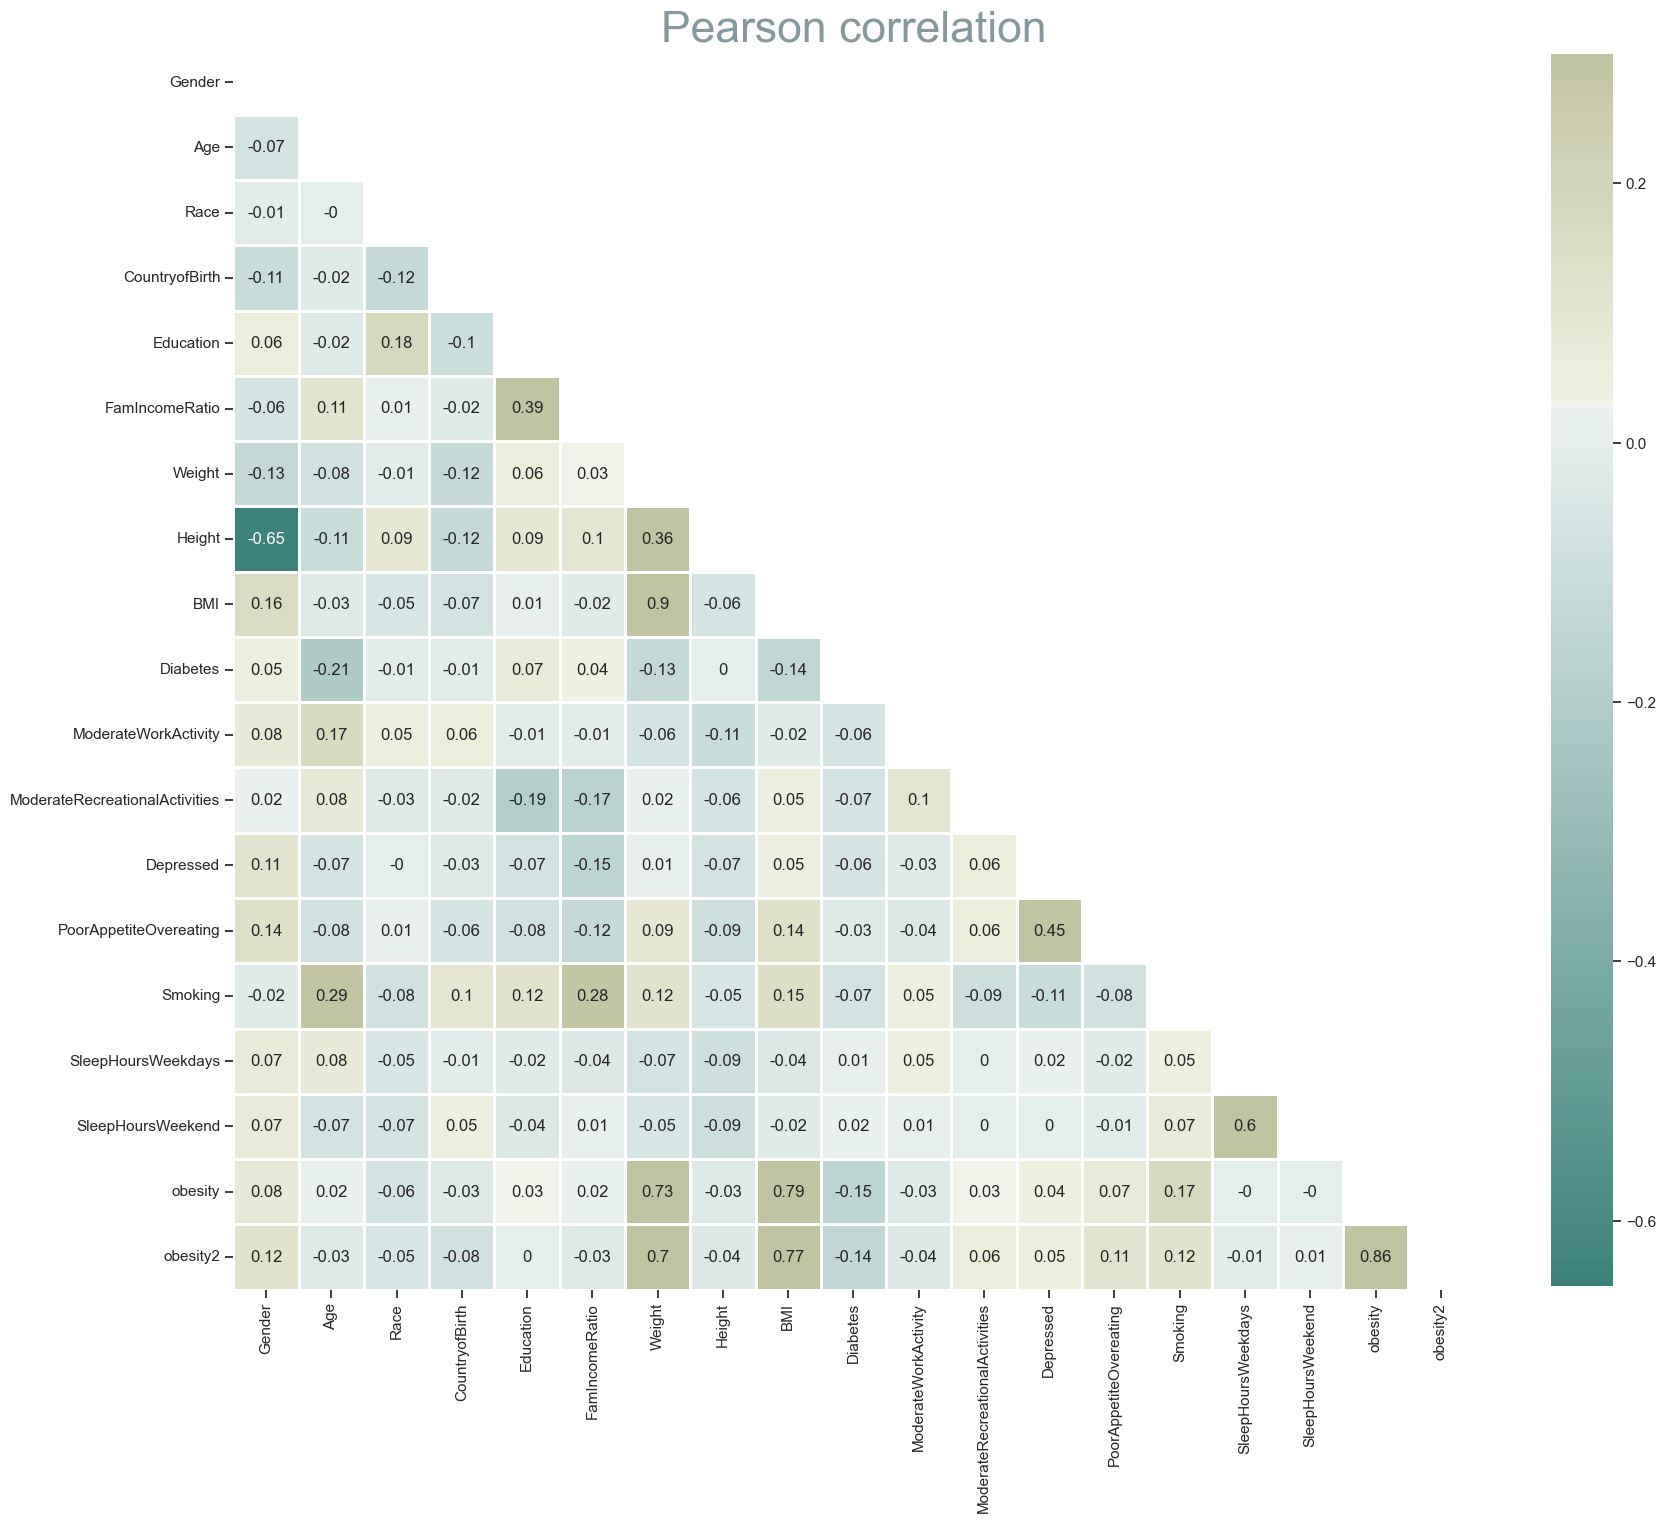

In [19]:
matrix_plot(df,'Pearson correlation')

In [20]:
df = df.drop(['obesity','Weight'], axis=1)

In [21]:
def matrix_plot(df,title):

    sns.set(style="ticks")

    corr = df.corr()
    corr = np.round(corr, decimals=2)


    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(20, 20))
    #cmap = sns.diverging_palette(580, 10, as_cmap=True)
    cmap = sns.diverging_palette(180, 90, as_cmap=True) #Inna paleta barw

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0.03,annot=True,
                square=True, linewidths=.9, cbar_kws={"shrink": 0.8})
    plt.xticks(rotation=90)
    plt.title(title,fontsize=32,color='#0c343d',alpha=0.5)
    plt.show

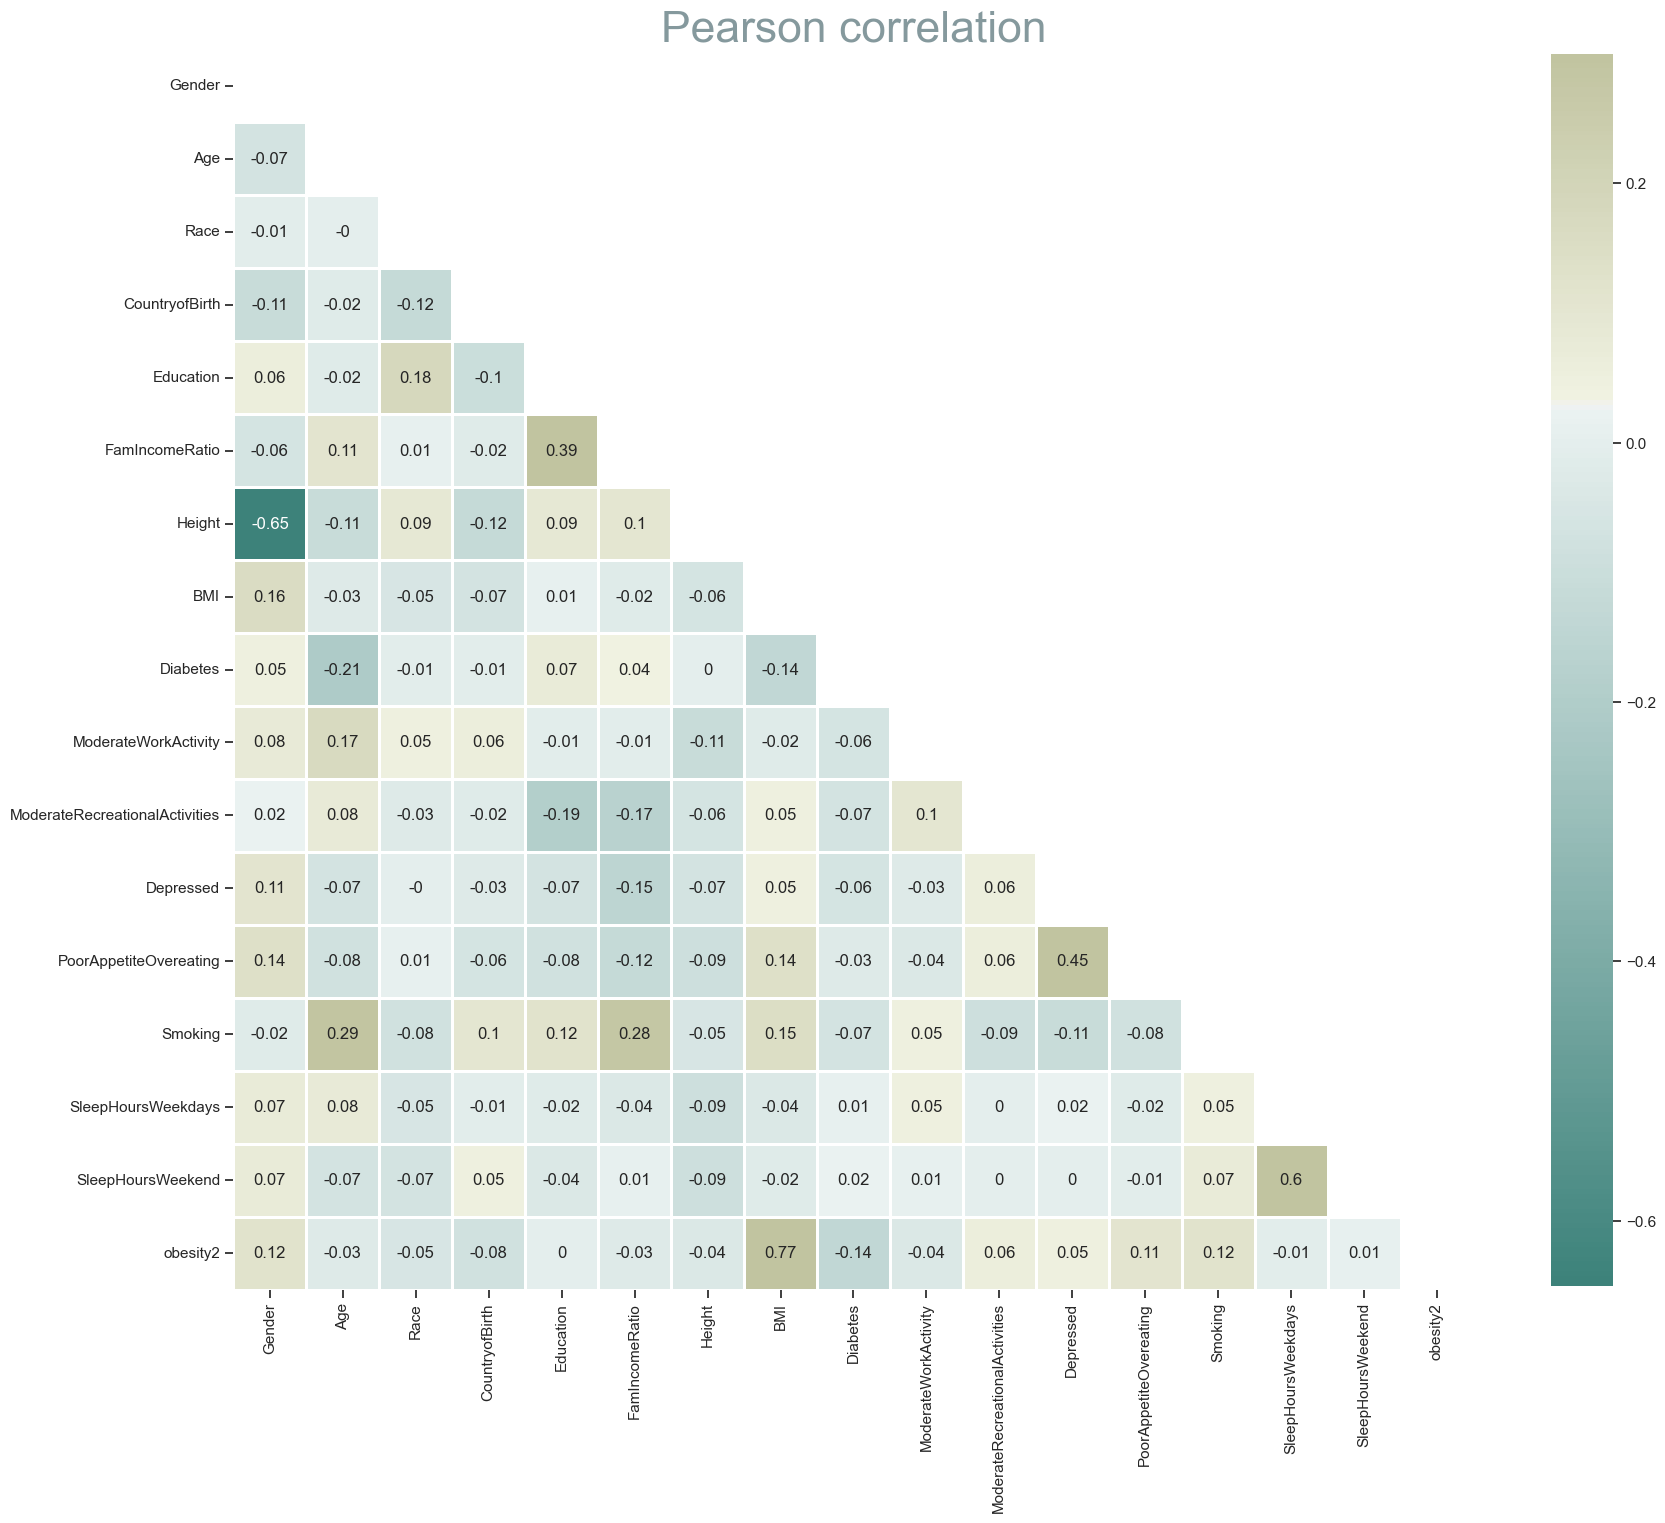

In [22]:
matrix_plot(df,'Pearson correlation')

In [23]:
df.head()

,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity2
0,1,36,3,1,4.0,0.83,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0,1
1,1,76,3,1,5.0,3.61,177.1,26.6,2,2.0,2.0,1.000000e+00,5.397605e-79,3.0,7.0,8.0,1
2,1,47,6,2,1.0,1.38,166.2,24.6,2,2.0,2.0,5.397605e-79,5.397605e-79,3.0,7.5,11.0,1
3,1,76,6,2,4.0,2.37,162.5,23.3,2,2.0,1.0,5.397605e-79,5.397605e-79,3.0,8.0,8.0,1
4,2,54,3,1,2.0,1.00,156.1,24.5,2,2.0,2.0,5.397605e-79,5.397605e-79,1.0,7.0,5.0,1


### Spliting The Dataset 

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
X_train.shape

(2292, 16)

In [26]:
X_test.shape

(573, 16)

In [27]:
y_train.shape

(2292,)

In [28]:
y_test.shape

(573,)

### Features  Transformation

In [29]:
mn = MinMaxScaler(feature_range = (0,1))

In [30]:
X_train = mn.fit_transform(X_train)

In [31]:
X_test = mn.fit_transform(X_test)

### Modeling & Evaluation

#### 1.Logistic Regression:

In [32]:
LR = LogisticRegression(C=4.0,max_iter=150)

In [33]:
LR.fit(X_train,y_train)

LogisticRegression(C=4.0, max_iter=150)

In [34]:
LR.coef_

array([[ 1.68528392e-01, -3.03019838e-01, -3.30089257e-01,
        -3.17679641e-01, -1.73649841e-01,  7.22192166e-04,
         2.75250318e-01,  3.53918636e+01, -6.96666186e-01,
        -6.04593942e-01,  1.34662650e+00, -3.21452282e-01,
         1.21002451e+00,  2.38713479e-01,  2.72409932e-01,
         4.56657985e-01]])

In [35]:
LR.intercept_

array([-8.47745635])

In [36]:
y_pred_l = LR.predict(X_test)


In [37]:
cm_LR = confusion_matrix(y_test, y_pred_l)
acc_LR = accuracy_score(y_test, y_pred_l)
clr_LR = classification_report(y_test, y_pred_l)
print('The accuracy is \n',acc_LR)
print('------------------')
print('The Confusion marix \n',cm_LR)
print('------------------')
print('The Classification Report \n',clr_LR)

The accuracy is 
 0.9092495636998255
------------------
The Confusion marix 
 [[286  48]
 [  4 235]]
------------------
The Classification Report 
               precision    recall  f1-score   support

           1       0.99      0.86      0.92       334
           2       0.83      0.98      0.90       239

    accuracy                           0.91       573
   macro avg       0.91      0.92      0.91       573
weighted avg       0.92      0.91      0.91       573



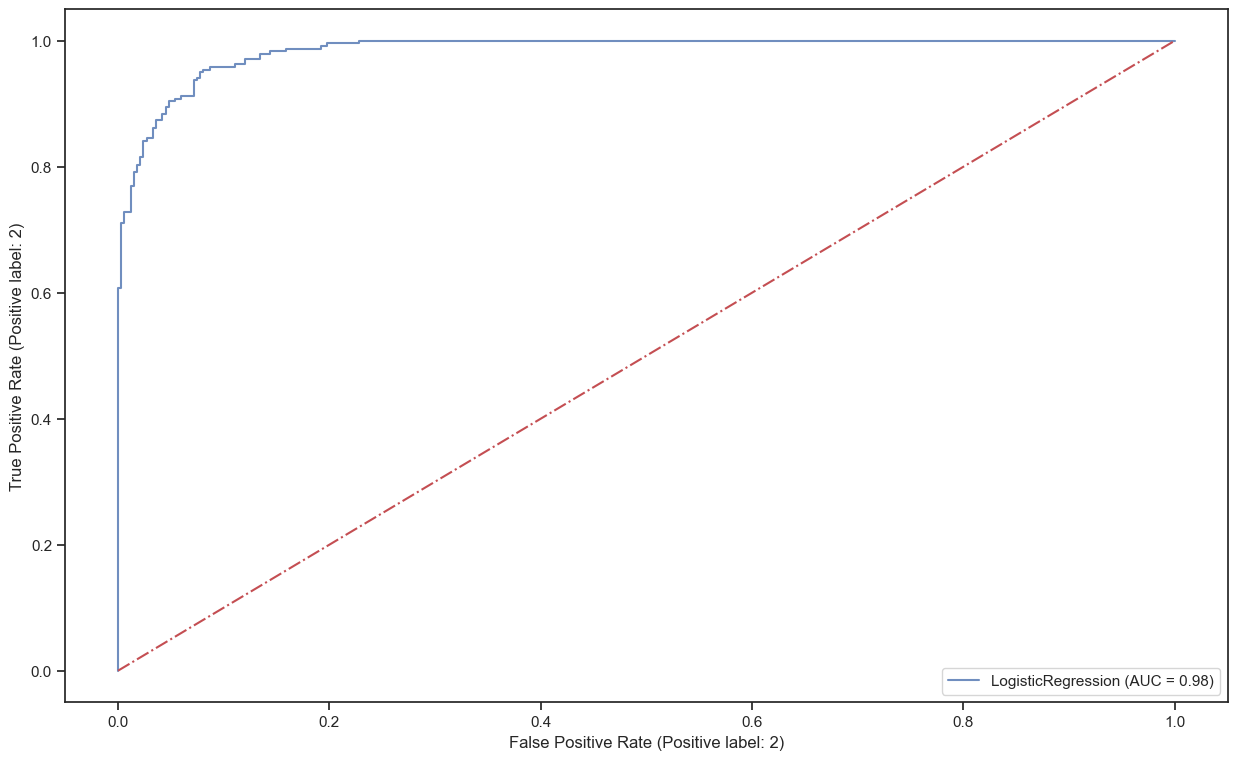

In [38]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(LR, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

#### 2.SVM:

In [120]:
svc = SVC(C=10, gamma = 0.1, )

In [121]:
svc.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [122]:
y_pred_S = svc.predict(X_test)

In [123]:
cm_SV = confusion_matrix(y_test, y_pred_S)
acc_SV = accuracy_score(y_test, y_pred_S)
clr_SV = classification_report(y_test, y_pred_S)
print('The accuracy is \n',acc_SV)
print('------------------')
print('The Confusion marix \n',cm_SV)
print('------------------')
print('The Classification Report \n',clr_SV)

The accuracy is 
 0.8952879581151832
------------------
The Confusion marix 
 [[276  58]
 [  2 237]]
------------------
The Classification Report 
               precision    recall  f1-score   support

           1       0.99      0.83      0.90       334
           2       0.80      0.99      0.89       239

    accuracy                           0.90       573
   macro avg       0.90      0.91      0.89       573
weighted avg       0.91      0.90      0.90       573



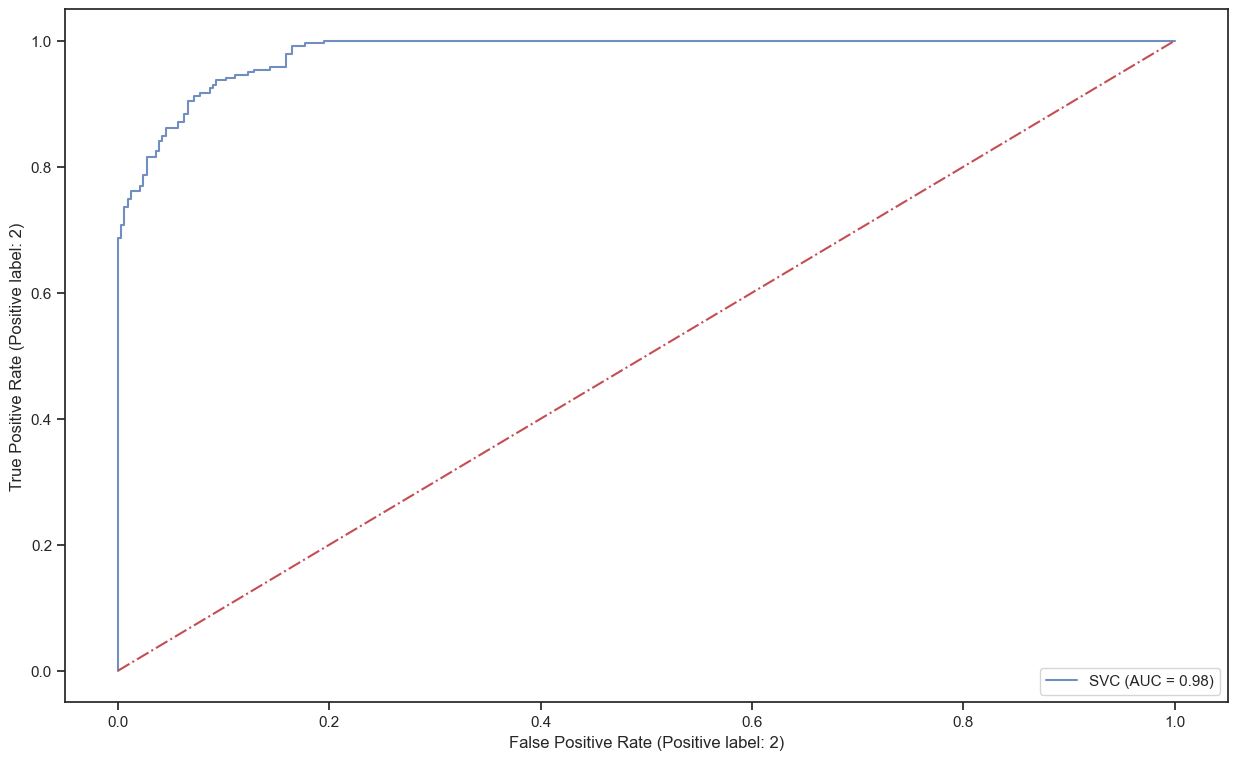

In [124]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

#### 3.Random Forest:

In [89]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


# Prediction:
y_pred_RF = rfc.predict(X_test)

In [90]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
acc_RF = accuracy_score(y_test, y_pred_RF)
clr_RF = classification_report(y_test, y_pred_RF)
print('The accuracy is \n',acc_RF)
print('------------------')
print('The Confusion marix \n',cm_RF)
print('------------------')
print('The Classification Report \n',clr_RF)

The accuracy is 
 0.9528795811518325
------------------
The Confusion marix 
 [[307  27]
 [  0 239]]
------------------
The Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96       334
           2       0.90      1.00      0.95       239

    accuracy                           0.95       573
   macro avg       0.95      0.96      0.95       573
weighted avg       0.96      0.95      0.95       573



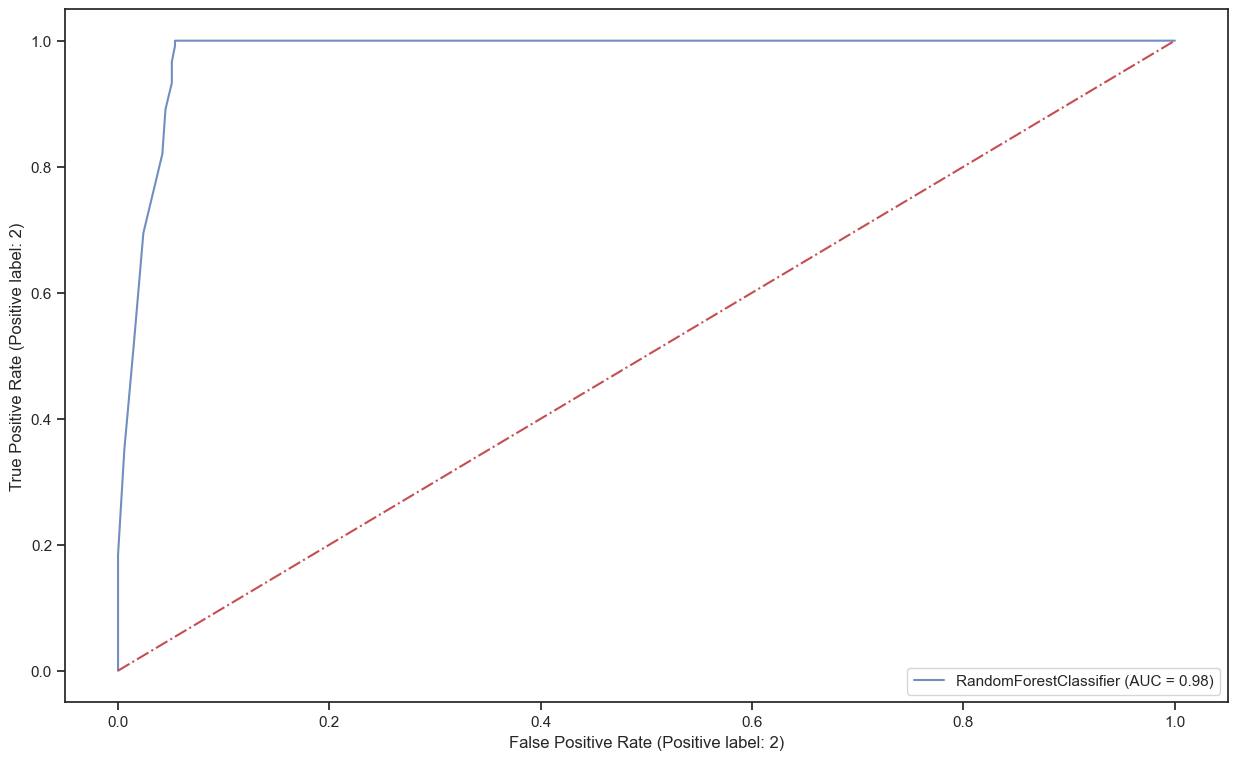

In [91]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

### 4.Desicion Tree

In [98]:
dt = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

In [99]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

In [100]:
y_pred_t = dt.predict(X_test)

In [101]:
cm_DT = confusion_matrix(y_test, y_pred_t)
acc_DT = accuracy_score(y_test, y_pred_t)
clr_DT = classification_report(y_test, y_pred_t)
print('The accuracy is \n',acc_DT)
print('------------------')
print('The Confusion marix \n',cm_DT)
print('------------------')
print('The Classification Report \n',clr_DT)

The accuracy is 
 0.9528795811518325
------------------
The Confusion marix 
 [[307  27]
 [  0 239]]
------------------
The Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96       334
           2       0.90      1.00      0.95       239

    accuracy                           0.95       573
   macro avg       0.95      0.96      0.95       573
weighted avg       0.96      0.95      0.95       573



#### 5.KNN

In [103]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
y_pred_k = knn.predict(X_test)
y_pred_k

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1,

In [105]:
cm_K = confusion_matrix(y_test, y_pred_k)
acc_K = accuracy_score(y_test, y_pred_k)
clr_K = classification_report(y_test, y_pred_k)
print('The accuracy is \n',acc_K)
print('------------------')
print('The Confusion marix \n',cm_K)
print('------------------')
print('The Classification Report \n',clr_K)

The accuracy is 
 0.6980802792321117
------------------
The Confusion marix 
 [[246  88]
 [ 85 154]]
------------------
The Classification Report 
               precision    recall  f1-score   support

           1       0.74      0.74      0.74       334
           2       0.64      0.64      0.64       239

    accuracy                           0.70       573
   macro avg       0.69      0.69      0.69       573
weighted avg       0.70      0.70      0.70       573



#### Thanks